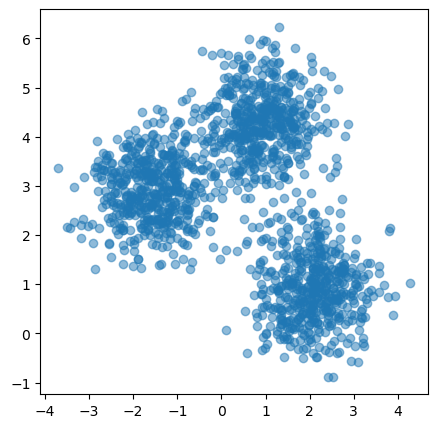

In [57]:
# K-means
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D


n_samples = 1500
X, _ = datasets.make_blobs(n_samples=n_samples, centers=3, cluster_std=0.7, n_features=2, random_state=0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5,)
plt.show()

In [58]:
from sklearn.cluster import KMeans

In [59]:
secrets_file = open("secrets.txt","r")

In [60]:
string = secrets_file.read()

In [61]:
string.split('\n')

['clientid: 0c28ac5b85714331bc30ad43546a8651',
 'clientsecret: 8f4845a54a8146de8db70184babac495',
 'Playlist variable/ID: 6fIBGTxbQBvx7QzN8YD23x']

In [62]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [63]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

In [64]:
top100songs = pd.read_csv('top100_songs.csv')
top100songs

song                artist
0                                         Lovin On Me           Jack Harlow
1                                       Lil Boo Thang          Paul Russell
2       I Remember Everything (feat. Kacey Musgraves)            Zach Bryan
3                                         White Horse       Chris Stapleton
4                        Save Me (with Lainey Wilson)            Jelly Roll
..                                                ...                   ...
95                                                 G6  2 Chainz & Lil Wayne
96                                             Strong           Anne Wilson
97                                          Gratitude          Brandon Lake
98  What Was I Made For? [From The Motion Picture ...         Billie Eilish
99  You Make It Feel Like Christmas (feat. Blake S...          Gwen Stefani

[100 rows x 2 columns]

In [65]:
from random import randint
from time import sleep

playlists = {'playlist1':'26CBTZI4r0J7mjBiKdYpAj','playlist2':'04Ruep6CsnaMj6hkVWCijF','playlist3':'0LgvI16qdnVo3unOV3QwPZ','playlist4':'7m0NV4mIecUrzzDcTO7MoF','playlist5':'46VokF5SA7GlrH3EN7V6mM','playlist6':'37i9dQZF1DZ06evO3T3SWA','playlist7':'7imhPbCOt3PziXKYa2izCj','playlist8':'7fmWp32vrXreC4iBzMfRu3','playlist9':'7KMtxb9kh3TtVvJTdLtJ2K','playlist10':'2LOxEzC4KmoWJ9NhW0kz5M','playlist11':'4cve5RGtLNCKVpmG84FmLm','playlist12':'37i9dQZF1DZ06evO3q8J1f','playlist13':'007GIl5o7aaULc2OgXmKC0'}

def all_tracks_playlist(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3000)/1000) # respectful nap
    return tracks

playlists_full = []

for key in playlists.keys():
    playlists_full = playlists_full + (all_tracks_playlist(playlists[key]))

In [66]:
len(playlists_full)

10040

In [67]:
playlists_full

[{'added_at': '2022-06-08T21:47:21Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/2133r3riqocvurzphbsgvg4ji'},
   'href': 'https://api.spotify.com/v1/users/2133r3riqocvurzphbsgvg4ji',
   'id': '2133r3riqocvurzphbsgvg4ji',
   'type': 'user',
   'uri': 'spotify:user:2133r3riqocvurzphbsgvg4ji'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2U5N2KMBT6aFPrQMygMkhj'},
      'href': 'https://api.spotify.com/v1/artists/2U5N2KMBT6aFPrQMygMkhj',
      'id': '2U5N2KMBT6aFPrQMygMkhj',
      'name': 'Offer Nissim',
      'type': 'artist',
      'uri': 'spotify:artist:2U5N2KMBT6aFPrQMygMkhj'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
    

In [68]:
song = playlists

In [69]:
audioframe = pd.read_csv('audioframe.csv')

In [70]:
audioframe.head()

track.name             name  \
0                            Bimbo - Original Mix     Offer Nissim   
1                           Do You Feel - Dub Mix     Offer Nissim   
2  Toda La Noche - Offer Nissim and Asi Tal Remix     Offer Nissim   
3  Toda La Noche - Offer Nissim and Asi Tal Remix  Meital De Razon   
4  Toda La Noche - Offer Nissim and Asi Tal Remix          Asi Tal   

                 track.id  danceability  energy  key  loudness  speechiness  \
0  4BAzHV2YHKrWsHzilpovcn         0.707   0.829    6    -6.039       0.0449   
1  5LdrP46nrnoxaY4TrUd4Qo         0.647   0.868    9    -9.561       0.0350   
2  3RbFm2iXSHm5tN8iRk9U47         0.660   0.837    6    -7.136       0.0618   
3  3RbFm2iXSHm5tN8iRk9U47         0.660   0.837    6    -7.136       0.0618   
4  3RbFm2iXSHm5tN8iRk9U47         0.660   0.837    6    -7.136       0.0618   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0       0.17600             0.861     0.696    0.204  124.008               4  
1       0.00383             0.873     0.162    0.478  127.008               4  
2       0.00241             0.900     0.222    0.178  128.016               4  
3       0.00241             0.900     0.222    0.178  128.016               4  
4       0.00241             0.900     0.222    0.178  128.016               4

In [71]:
len(audioframe)

10722

In [72]:
audioframe['song_and_artist'] = audioframe['track.name'] + ' - ' + audioframe['name']

In [73]:
audioframe

track.name             name  \
0                                Bimbo - Original Mix     Offer Nissim   
1                               Do You Feel - Dub Mix     Offer Nissim   
2      Toda La Noche - Offer Nissim and Asi Tal Remix     Offer Nissim   
3      Toda La Noche - Offer Nissim and Asi Tal Remix  Meital De Razon   
4      Toda La Noche - Offer Nissim and Asi Tal Remix          Asi Tal   
...                                               ...              ...   
10717                             Si Quieren Frontear          Quevedo   
10718                                        RUMBATÓN     Daddy Yankee   
10719                                 I'm Good (Blue)     David Guetta   
10720                                 I'm Good (Blue)       Bebe Rexha   
10721                                     Say My Name     David Guetta   

                     track.id  danceability  energy  key  loudness  \
0      4BAzHV2YHKrWsHzilpovcn         0.707   0.829    6    -6.039   
1      5LdrP46nrnoxaY4TrUd4Qo         0.647   0.868    9    -9.561   
2      3RbFm2iXSHm5tN8iRk9U47         0.660   0.837    6    -7.136   
3      3RbFm2iXSHm5tN8iRk9U47         0.660   0.837    6    -7.136   
4      3RbFm2iXSHm5tN8iRk9U47         0.660   0.837    6    -7.136   
...                       ...           ...     ...  ...       ...   
10717  6bQ5823aHmFVKLZW8E7rRo         0.789   0.837   10    -3.247   
10718  3XjN0mvFkQp1FMVM9Ro5hm         0.685   0.909    3    -4.034   
10719  4uUG5RXrOk84mYEfFvj3cK         0.561   0.965    7    -3.673   
10720  4uUG5RXrOk84mYEfFvj3cK         0.561   0.965    7    -3.673   
10721  0YammaEkYSeo9vQYZ1OwS6         0.703   0.660   10    -5.119   

       speechiness  acousticness  instrumentalness  liveness  valence  \
0           0.0449       0.17600          0.861000     0.696    0.204   
1           0.0350       0.00383          0.873000     0.162    0.478   
2           0.0618       0.00241          0.900000     0.222    0.178   
3           0.0618       0.00241          0.900000     0.222    0.178   
4           0.0618       0.00241          0.900000     0.222    0.178   
...            ...           ...               ...       ...      ...   
10717       0.2300       0.12500          0.000000     0.209    0.476   
10718       0.0396       0.04710          0.000000     0.350    0.922   
10719       0.0343       0.00383          0.000007     0.371    0.304   
10720       0.0343       0.00383          0.000007     0.371    0.304   
10721       0.1230       0.13700          0.000000     0.192    0.790   

         tempo  time_signature  \
0      124.008               4   
1      127.008               4   
2      128.016               4   
3      128.016               4   
4      128.016               4   
...        ...             ...   
10717   81.536               4   
10718   95.004               4   
10719  128.040               4   
10720  128.040               4   
10721   95.031               4   

                                         song_and_artist  
0                    Bimbo - Original Mix - Offer Nissim  
1                   Do You Feel - Dub Mix - Offer Nissim  
2      Toda La Noche - Offer Nissim and Asi Tal Remix...  
3      Toda La Noche - Offer Nissim and Asi Tal Remix...  
4      Toda La Noche - Offer Nissim and Asi Tal Remix...  
...                                                  ...  
10717                      Si Quieren Frontear - Quevedo  
10718                            RUMBATÓN - Daddy Yankee  
10719                     I'm Good (Blue) - David Guetta  
10720                       I'm Good (Blue) - Bebe Rexha  
10721                         Say My Name - David Guetta  

[10722 rows x 15 columns]

In [74]:
audioframe['track.name'] = audioframe['track.name'].str.lower()

In [75]:
audioframe.to_csv('song_features.csv', index=False)

In [76]:
cluster_features = audioframe.drop(['track.name','name','track.id','song_and_artist'],axis=1)

In [77]:
cluster_features.to_csv('cluster_features.csv', index=False)

In [78]:
cluster_features.head()

danceability  energy  key  loudness  speechiness  acousticness  \
0         0.707   0.829    6    -6.039       0.0449       0.17600   
1         0.647   0.868    9    -9.561       0.0350       0.00383   
2         0.660   0.837    6    -7.136       0.0618       0.00241   
3         0.660   0.837    6    -7.136       0.0618       0.00241   
4         0.660   0.837    6    -7.136       0.0618       0.00241   

   instrumentalness  liveness  valence    tempo  time_signature  
0             0.861     0.696    0.204  124.008               4  
1             0.873     0.162    0.478  127.008               4  
2             0.900     0.222    0.178  128.016               4  
3             0.900     0.222    0.178  128.016               4  
4             0.900     0.222    0.178  128.016               4

In [79]:
cols = cluster_features.columns
cols

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [80]:
audioframe.columns

Index(['track.name', 'name', 'track.id', 'danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'song_and_artist'],
      dtype='object')

In [81]:
scaler = StandardScaler().fit(cluster_features)
standard_cluster = scaler.transform(cluster_features)

standard_cluster = pd.DataFrame(standard_cluster,columns=cluster_features.columns)

In [82]:
standard_cluster.to_csv('std_features.csv')

C:\Users\harri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

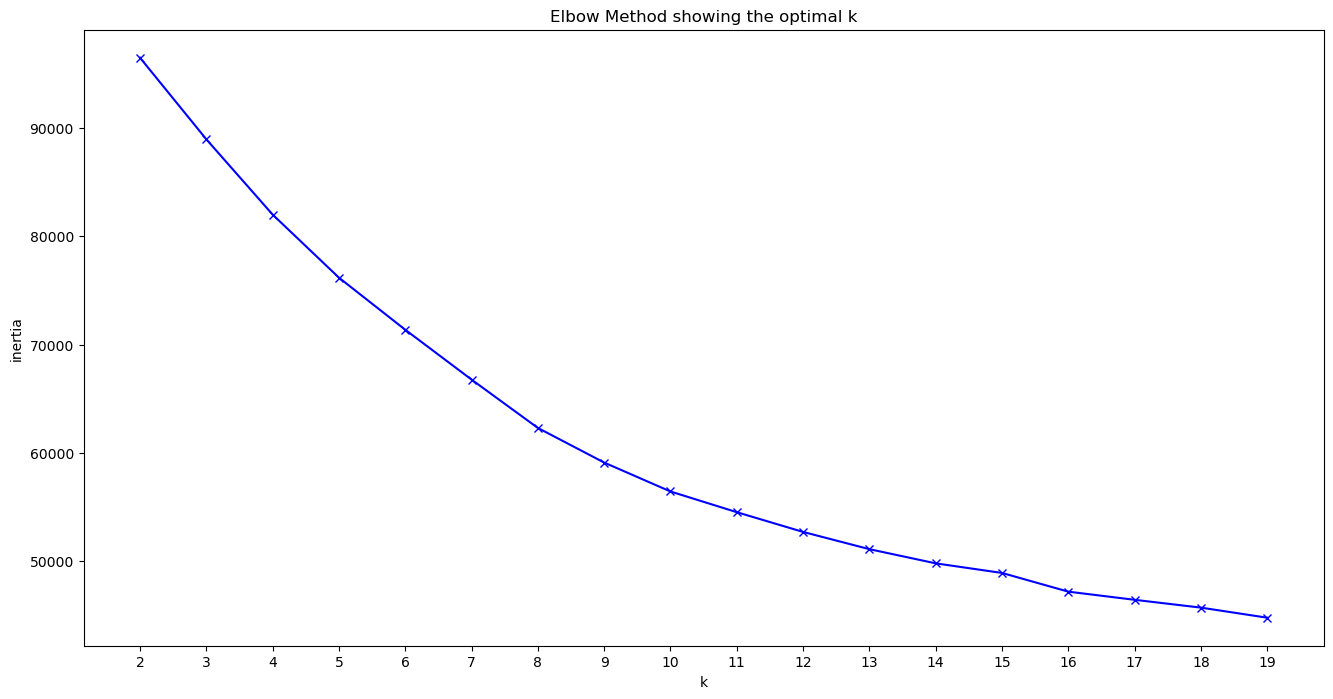

In [83]:
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(standard_cluster)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [84]:
kmeans = KMeans(n_clusters=13, random_state=1234).fit(standard_cluster)
clusters = kmeans.predict(standard_cluster)
pd.Series(clusters).value_counts().sort_index()

C:\Users\harri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0      565
1      938
2     1527
3     1158
4      300
5     1831
6      469
7     1177
8       47
9       30
10     201
11    1891
12     588
dtype: int64

In [85]:
import pickle
pickle.dump(kmeans, open('kmean.pkl', 'wb'))

In [86]:
cluster_data = pd.concat([audio_features,pd.Series(clusters)],axis=1)

In [87]:
cluster_data

track.name             name  \
0                                bimbo - original mix     Offer Nissim   
1                               do you feel - dub mix     Offer Nissim   
2      toda la noche - offer nissim and asi tal remix     Offer Nissim   
3      toda la noche - offer nissim and asi tal remix  Meital De Razon   
4      toda la noche - offer nissim and asi tal remix          Asi Tal   
...                                               ...              ...   
10717                             si quieren frontear          Quevedo   
10718                                        rumbatón     Daddy Yankee   
10719                                 i'm good (blue)     David Guetta   
10720                                 i'm good (blue)       Bebe Rexha   
10721                                     say my name     David Guetta   

                     track.id  danceability  energy  key  loudness  \
0      4BAzHV2YHKrWsHzilpovcn         0.707   0.829    6    -6.039   
1      5LdrP46nrnoxaY4TrUd4Qo         0.647   0.868    9    -9.561   
2      3RbFm2iXSHm5tN8iRk9U47         0.660   0.837    6    -7.136   
3      3RbFm2iXSHm5tN8iRk9U47         0.660   0.837    6    -7.136   
4      3RbFm2iXSHm5tN8iRk9U47         0.660   0.837    6    -7.136   
...                       ...           ...     ...  ...       ...   
10717  6bQ5823aHmFVKLZW8E7rRo         0.789   0.837   10    -3.247   
10718  3XjN0mvFkQp1FMVM9Ro5hm         0.685   0.909    3    -4.034   
10719  4uUG5RXrOk84mYEfFvj3cK         0.561   0.965    7    -3.673   
10720  4uUG5RXrOk84mYEfFvj3cK         0.561   0.965    7    -3.673   
10721  0YammaEkYSeo9vQYZ1OwS6         0.703   0.660   10    -5.119   

       speechiness  acousticness  instrumentalness  liveness  valence  \
0           0.0449       0.17600          0.861000     0.696    0.204   
1           0.0350       0.00383          0.873000     0.162    0.478   
2           0.0618       0.00241          0.900000     0.222    0.178   
3           0.0618       0.00241          0.900000     0.222    0.178   
4           0.0618       0.00241          0.900000     0.222    0.178   
...            ...           ...               ...       ...      ...   
10717       0.2300       0.12500          0.000000     0.209    0.476   
10718       0.0396       0.04710          0.000000     0.350    0.922   
10719       0.0343       0.00383          0.000007     0.371    0.304   
10720       0.0343       0.00383          0.000007     0.371    0.304   
10721       0.1230       0.13700          0.000000     0.192    0.790   

         tempo  time_signature  \
0      124.008               4   
1      127.008               4   
2      128.016               4   
3      128.016               4   
4      128.016               4   
...        ...             ...   
10717   81.536               4   
10718   95.004               4   
10719  128.040               4   
10720  128.040               4   
10721   95.031               4   

                                         song_and_artist   0  
0                    Bimbo - Original Mix - Offer Nissim   0  
1                   Do You Feel - Dub Mix - Offer Nissim   0  
2      Toda La Noche - Offer Nissim and Asi Tal Remix...   0  
3      Toda La Noche - Offer Nissim and Asi Tal Remix...   0  
4      Toda La Noche - Offer Nissim and Asi Tal Remix...   0  
...                                                  ...  ..  
10717                      Si Quieren Frontear - Quevedo   4  
10718                            RUMBATÓN - Daddy Yankee   5  
10719                     I'm Good (Blue) - David Guetta   2  
10720                       I'm Good (Blue) - Bebe Rexha   2  
10721                         Say My Name - David Guetta  11  

[10722 rows x 16 columns]

In [88]:
cluster_data = cluster_data.rename(columns={0:'cluster'})

In [89]:
cluster_data.to_csv('cluster_data.csv')

In [90]:
kmeans.inertia_

51100.43126863422

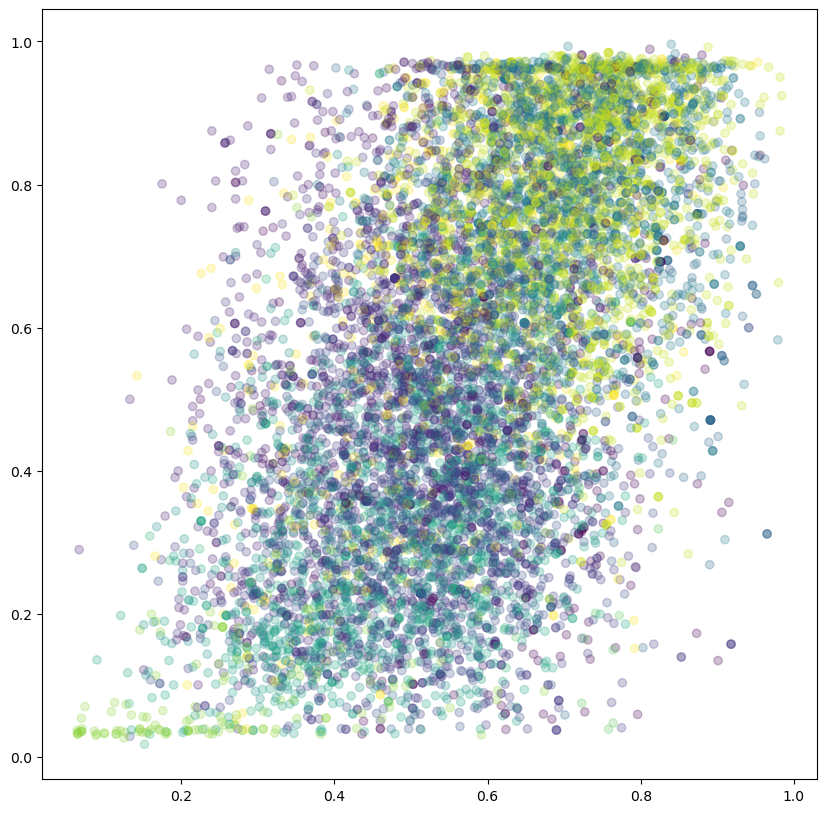

In [91]:
plt.figure(figsize=(10, 10))
plt.scatter(cluster_features['danceability'], cluster_features['valence'], c=clusters,alpha=0.25)
plt.show()

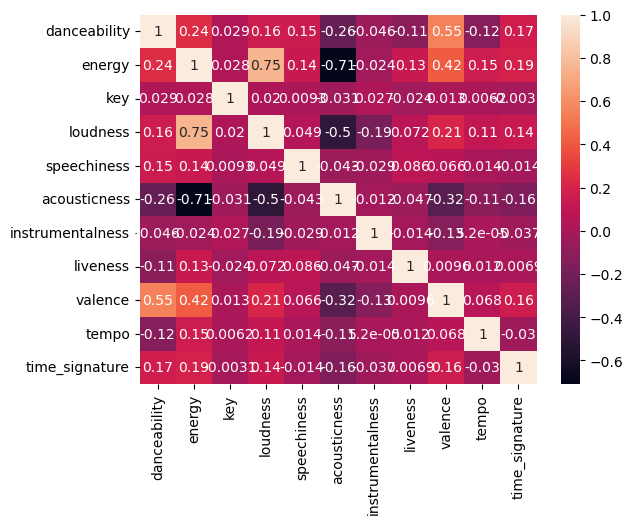

In [92]:
import seaborn as sns

correlation_matrix = cluster_features.corr()

sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [99]:
import random 
new_song = input("Enter song: ")
new_artist = input("Enter artist: ")

if new_song in list(top100songs['song']):
    print(random.choice(list(top100songs['song'])))
else:
    print('No Recommendation')

Enter song: White Horse
Enter artist: Chris Stapleton
Lovin On Me


In [94]:
import requests
import getpass
cid = getpass.getpass()
secret_id = getpass.getpass()

········
········


In [95]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=cid,
                                                           client_secret=secret_id))

In [96]:
def features(track, artist):
    track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')
    uri = track_id["tracks"]["items"][0]['id']
    features = sp.audio_features(uri)
    return features

In [97]:
new_song = input("Enter song: ").lower()
new_artist = input("Enter artist: ").lower()

test_entry = sp.search(q=new_song, type='track')
wrong_entry = test_entry["tracks"]["total"]
print(wrong_entry)

Enter song: Heart Attack
Enter artist: Offer Nissim
839


In [104]:
new_song = input("Enter song: ").lower()
new_artist = input("Enter artist: ").lower()

test_entry = sp.search(q=new_song, type='track')
wrong_entry = test_entry["tracks"]["total"] 

while wrong_entry == 0:
    print("Song does not exists, try another")
    new_song = input("Enter song: ").lower()
    new_artist = input("Enter artist: ").lower()
    test_entry = sp.search(q=new_song, type='track')
    wrong_entry = test_entry["tracks"]["total"]

if new_song in list(top100songs['song']):
    recommendation_hot = random.choice(list(top100songs['song']))
    while recommendation_hot == new_song:
            recommendation_hot = random.choice(list(top100songs['song']))
            print('Your recommendation:', recommendation_hot)
else:
    feature = features(new_song, new_artist)
    column = list(feature[0].keys())
    values = [list(feature[0].values())]
    df_new_song = pd.DataFrame(data = feature, columns = column)
    df_new_song = df_new_song.drop(['type','id','uri','track_href','analysis_url','duration_ms','mode'],axis=1)
    std_new_song = scaler.transform(df_new_song)
    new_cluster = kmeans.predict(std_new_song)
    df_cluster = cluster_data[cluster_data['cluster'] == list(new_cluster)[0]]

    print('Your recommendation:',random.choice(list(df_cluster['song_and_artist'])))

Enter song: Opera Singer
Enter artist: Cake
Your recommendation: How Deep Is Your Love - Bee Gees


C:\Users\harri\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
